In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

2024-10-06 09:57:01.854312: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-06 09:57:01.860806: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-06 09:57:01.885664: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 09:57:01.925083: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 09:57:01.936701: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 09:57:03.882391: W tensorflow/compiler/tf2tensorrt/utils/p

In [76]:
df = pd.read_csv("market.csv",header='infer')
 

In [59]:
tf.random.set_seed(123)

In [77]:
df.head()

,Unnamed: 0,Date,Crop,Market_Price,Production_Cost,Gross_Profit_Margin
0,0,2022-01-01,Cabbage,11.78,9.09,22.82
1,1,2022-02-01,Cabbage,11.20,8.80,21.45
2,2,2022-03-01,Cabbage,14.76,6.07,58.88
3,3,2022-04-01,Cabbage,21.01,3.39,83.88
4,4,2022-05-01,Cabbage,21.04,3.08,85.36


In [78]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [79]:
df.head()

,Date,Crop,Market_Price,Production_Cost,Gross_Profit_Margin
0,2022-01-01,Cabbage,11.78,9.09,22.82
1,2022-02-01,Cabbage,11.20,8.80,21.45
2,2022-03-01,Cabbage,14.76,6.07,58.88
3,2022-04-01,Cabbage,21.01,3.39,83.88
4,2022-05-01,Cabbage,21.04,3.08,85.36


In [80]:
label_encoder = LabelEncoder()

In [81]:
df['Crop_Encoded'] = label_encoder.fit_transform(df['Crop'])

In [35]:
df.head(65)

,Date,Crop,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded
0,2022-01-01,Cabbage,11.78,9.09,22.82,23
1,2022-02-01,Cabbage,11.20,8.80,21.45,23
2,2022-03-01,Cabbage,14.76,6.07,58.88,23
3,2022-04-01,Cabbage,21.01,3.39,83.88,23
4,2022-05-01,Cabbage,21.04,3.08,85.36,23
...,...,...,...,...,...,...
60,2024-01-01,Spinach,17.87,6.08,65.97,133
61,2024-02-01,Spinach,19.61,8.68,55.72,133
62,2024-03-01,Spinach,12.38,3.72,69.94,133
63,2024-04-01,Spinach,22.76,7.25,68.16,133


In [36]:
# Save the DataFrame to an Excel file
df.to_excel("encoded_crops.xlsx", index=False)

In [41]:
filtered_df = df[df['Crop'].isin(['Cabbage', 'Spinach'])]
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


/tmp/ipykernel_2560899/2270706863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


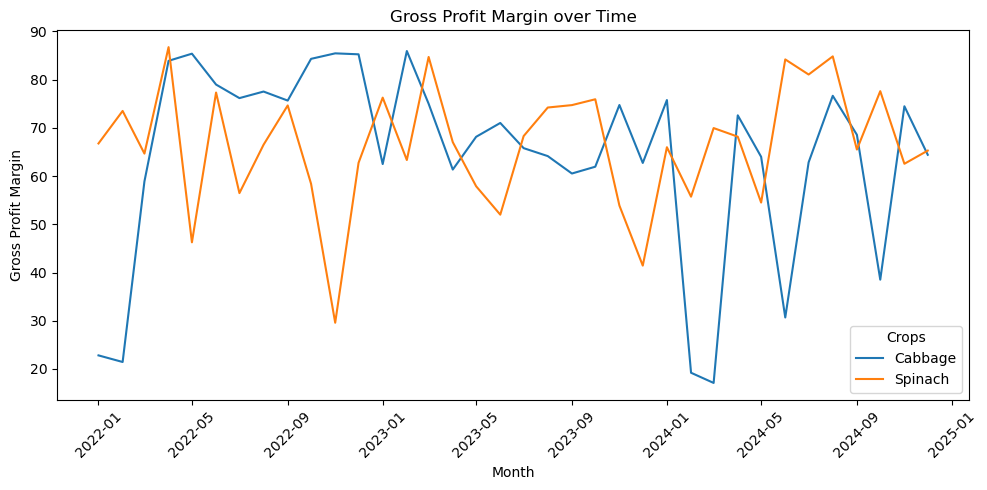

In [38]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
for crop in filtered_df['Crop'].unique():
    crop_data = filtered_df[filtered_df['Crop'] == crop]
    plt.plot(crop_data['Date'], crop_data['Gross_Profit_Margin'], label=crop)

plt.title('Gross Profit Margin over Time')
plt.xlabel('Month')
plt.ylabel('Gross Profit Margin')
plt.legend(title="Crops")
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [42]:
filtered_df = filtered_df[filtered_df['Date'] < '2024-11-01']

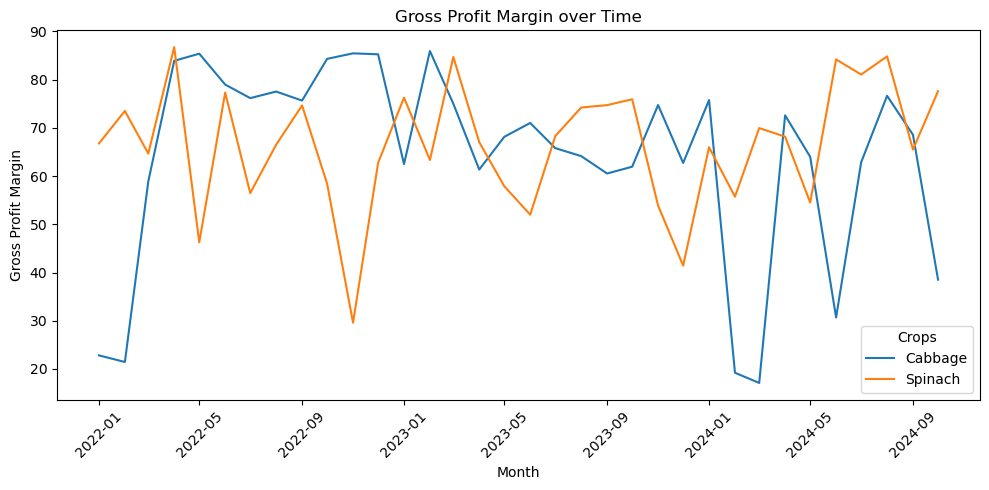

In [43]:
# Plotting
plt.figure(figsize=(10, 5))
for crop in filtered_df['Crop'].unique():
    crop_data = filtered_df[filtered_df['Crop'] == crop]
    plt.plot(crop_data['Date'], crop_data['Gross_Profit_Margin'], label=crop)

plt.title('Gross Profit Margin over Time')
plt.xlabel('Month')
plt.ylabel('Gross Profit Margin')
plt.legend(title="Crops")
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [49]:
df = df[df['Date'] < '2024-10-31']

In [50]:
df.tail(5)

,Date,Crop,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded
5968,2024-05-01,Vanilla,11.96,6.33,47.05,154
5969,2024-06-01,Vanilla,10.31,9.70,5.94,154
5970,2024-07-01,Vanilla,15.84,5.00,68.42,154
5971,2024-08-01,Vanilla,11.47,6.81,40.60,154
5972,2024-09-01,Vanilla,12.11,9.24,23.77,154


In [51]:
df.to_excel("Train_data_market.xlsx", index=False)

In [52]:
df.describe()

,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded
count,5478.000000,5478.000000,5478.000000,5478.000000
mean,19.969317,6.487391,64.313859,82.174699
std,5.781582,1.999585,16.334174,47.544173
min,10.000000,3.000000,2.560000,0.000000
25%,14.900000,4.760000,55.590000,41.000000
50%,20.120000,6.500000,67.595000,82.500000
75%,24.997500,8.170000,76.307500,123.000000
max,30.000000,10.000000,89.660000,164.000000


In [53]:
filtered_df = df[df['Crop'].isin(['Cabbage', 'Spinach'])]
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


/tmp/ipykernel_2560899/2270706863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


In [54]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 0 to 68
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 66 non-null     datetime64[ns]
 1   Crop                 66 non-null     object        
 2   Market_Price         66 non-null     float64       
 3   Production_Cost      66 non-null     float64       
 4   Gross_Profit_Margin  66 non-null     float64       
 5   Crop_Encoded         66 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 3.6+ KB


In [58]:
df.drop(columns=['Date','Crop']).corr()

,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded
Market_Price,1.000000,0.010887,0.676670,-0.023209
Production_Cost,0.010887,1.000000,-0.668762,0.008107
Gross_Profit_Margin,0.676670,-0.668762,1.000000,-0.021001
Crop_Encoded,-0.023209,0.008107,-0.021001,1.000000


In [60]:
# 1. Data Overview
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Data Types:
Date                    object
Crop                    object
Market_Price           float64
Production_Cost        float64
Gross_Profit_Margin    float64
Crop_Encoded             int64
dtype: object

Missing Values:
Date                   0
Crop                   0
Market_Price           0
Production_Cost        0
Gross_Profit_Margin    0
Crop_Encoded           0
dtype: int64

Basic Statistics:
       Market_Price  Production_Cost  Gross_Profit_Margin  Crop_Encoded
count   5478.000000      5478.000000          5478.000000   5478.000000
mean      19.969317         6.487391            64.313859     82.174699
std        5.781582         1.999585            16.334174     47.544173
min       10.000000         3.000000             2.560000      0.000000
25%       14.900000         4.760000            55.590000     41.000000
50%       20.120000         6.500000            67.595000     82.500000
75%       24.997500         8.170000            76.307500    123.000000
max       30.

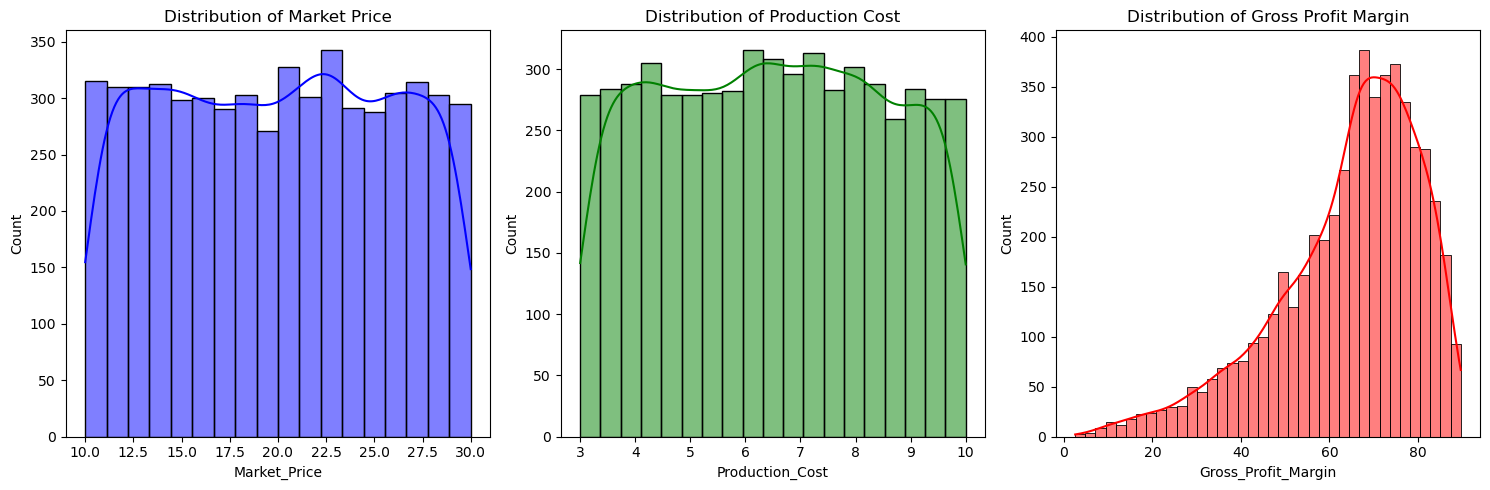

In [62]:
import seaborn as sns
# 2. Univariate Analysis - Distribution of Numerical Variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Market_Price'], kde=True, color='blue')
plt.title('Distribution of Market Price')

plt.subplot(1, 3, 2)
sns.histplot(df['Production_Cost'], kde=True, color='green')
plt.title('Distribution of Production Cost')

plt.subplot(1, 3, 3)
sns.histplot(df['Gross_Profit_Margin'], kde=True, color='red')
plt.title('Distribution of Gross Profit Margin')

plt.tight_layout()
plt.show()

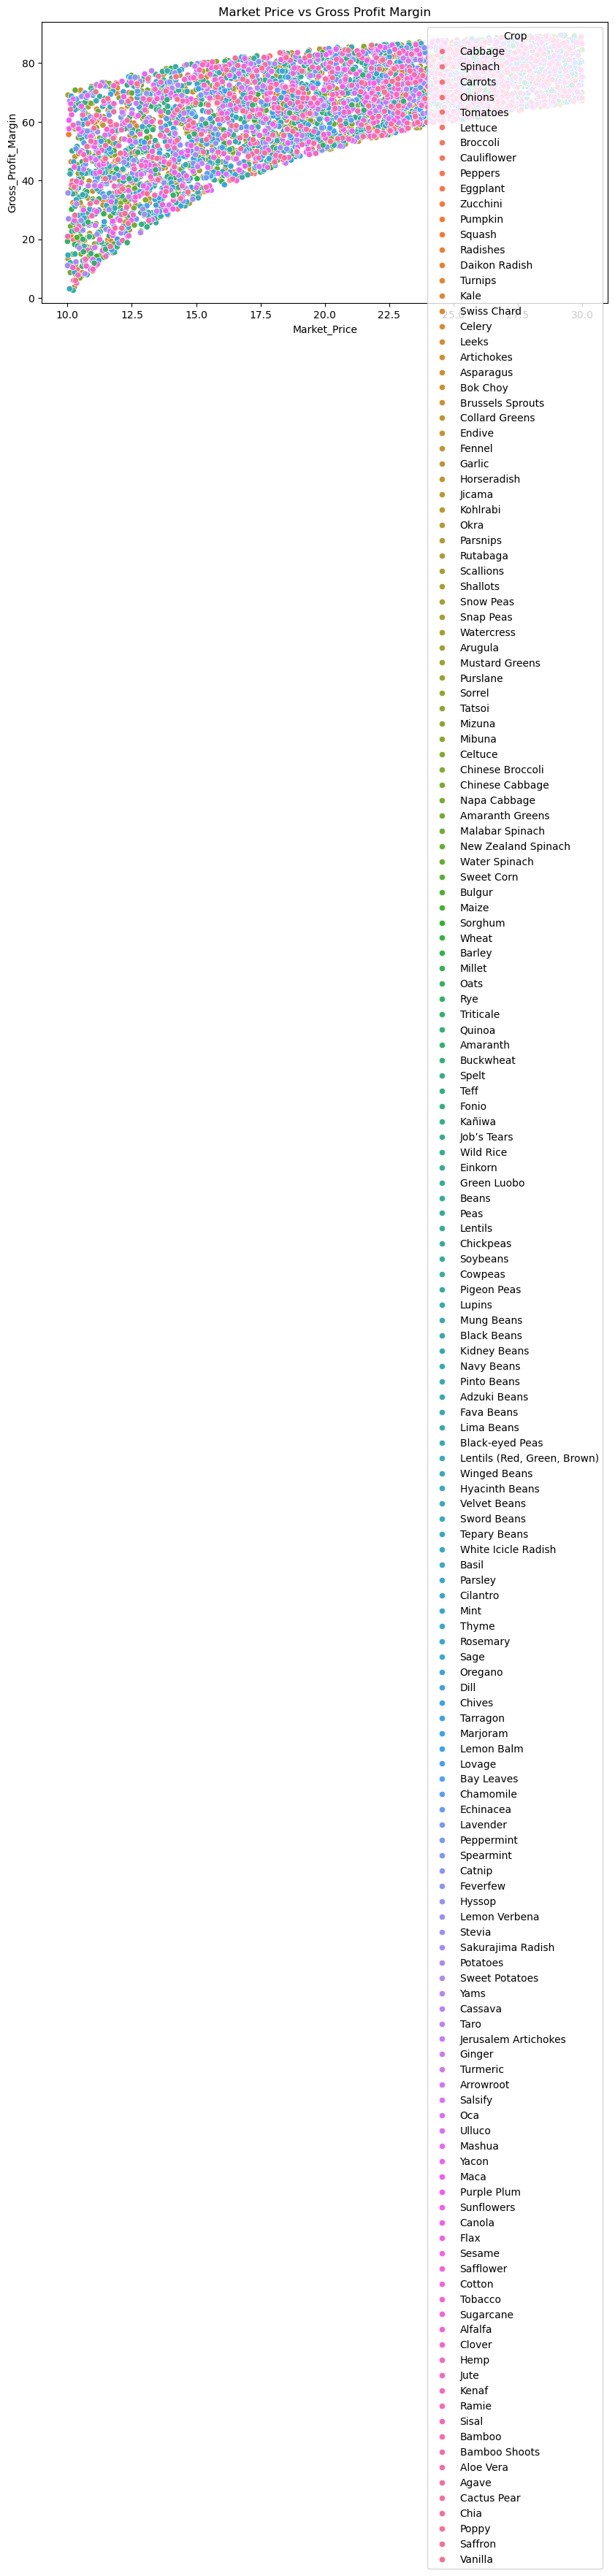

In [63]:
# 3. Bivariate Analysis - Relationship Between Variables
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Market_Price', y='Gross_Profit_Margin', hue='Crop', data=df)
plt.title('Market Price vs Gross Profit Margin')
plt.show()

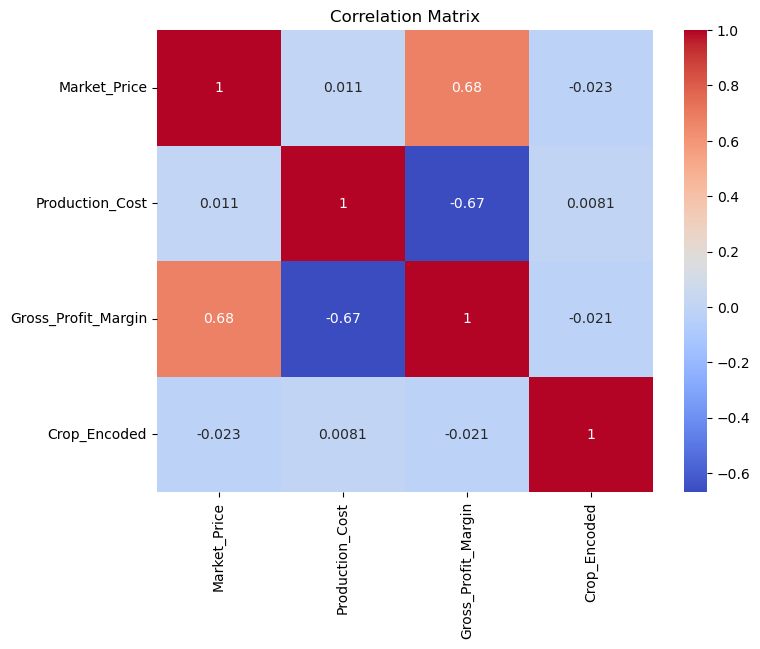

In [65]:
# 4. Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['Date','Crop']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

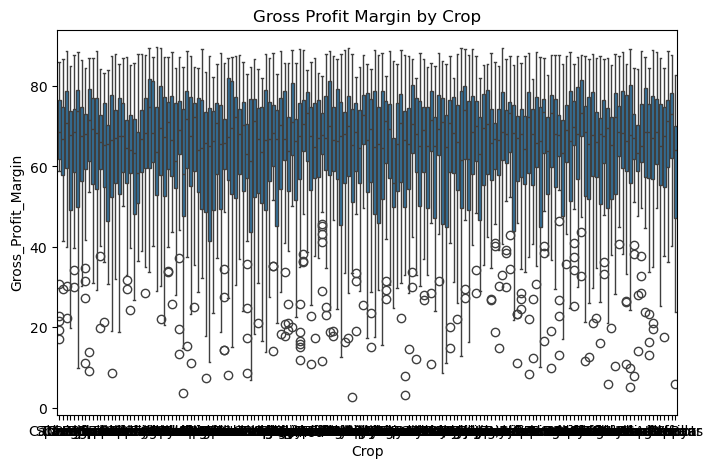

In [66]:
# 5. Boxplot for Gross Profit Margin by Crop
plt.figure(figsize=(8, 5))
sns.boxplot(x='Crop', y='Gross_Profit_Margin', data=df)
plt.title('Gross Profit Margin by Crop')
plt.show()

In [108]:
df.head(45)

,Date,Crop,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded,Gross_Profit_Margin_Lag1,Gross_Profit_Margin_Lag2,Gross_Profit_Margin_Lag3,Rolling_Mean_3,Rolling_Std_3
3,2022-04-01,Cabbage,21.01,3.39,83.88,23,58.88,21.45,22.82,54.736667,31.420561
4,2022-05-01,Cabbage,21.04,3.08,85.36,23,83.88,58.88,21.45,76.040000,14.879409
5,2022-06-01,Cabbage,18.67,3.93,78.96,23,85.36,83.88,58.88,82.733333,3.350542
6,2022-07-01,Cabbage,17.69,4.22,76.15,23,78.96,85.36,83.88,80.156667,4.720173
7,2022-08-01,Cabbage,22.81,5.13,77.51,23,76.15,78.96,85.36,77.540000,1.405240
8,2022-09-01,Cabbage,29.18,7.11,75.64,23,77.51,76.15,78.96,76.433333,0.966661
9,2022-10-01,Cabbage,27.96,4.39,84.29,23,75.64,77.51,76.15,79.146667,4.551333
10,2022-11-01,Cabbage,27.09,3.95,85.43,23,84.29,75.64,77.51,81.786667,5.353600
11,2022-12-01,Cabbage,21.02,3.11,85.23,23,85.43,84.29,75.64,84.983333,0.608714
12,2023-01-01,Cabbage,14.40,5.40,62.48,23,85.23,85.43,84.29,77.713333,13.192833


In [83]:
toTrain = df.drop(columns=['Crop'])

In [84]:
toTrain.head()

,Date,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded
0,2022-01-01,11.78,9.09,22.82,23
1,2022-02-01,11.20,8.80,21.45,23
2,2022-03-01,14.76,6.07,58.88,23
3,2022-04-01,21.01,3.39,83.88,23
4,2022-05-01,21.04,3.08,85.36,23


In [85]:
toTrain.tail()

,Date,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded
5971,2024-08-01,11.47,6.81,40.60,154
5972,2024-09-01,12.11,9.24,23.77,154
5973,2024-10-01,14.43,3.97,72.50,154
5974,2024-11-01,10.90,7.83,28.16,154
5975,2024-12-01,16.23,9.85,39.34,154


In [86]:
toTrain['Date'] = pd.to_datetime(toTrain['Date'])
toTrain = toTrain.set_index('Date')


In [90]:
# Create lag features for Gross_Profit_Margin
toTrain['Gross_Profit_Margin_Lag1'] = toTrain['Gross_Profit_Margin'].shift(1)
toTrain['Gross_Profit_Margin_Lag2'] = toTrain['Gross_Profit_Margin'].shift(2)
toTrain['Gross_Profit_Margin_Lag3'] = toTrain['Gross_Profit_Margin'].shift(3)


In [91]:
toTrain['Rolling_Mean_3'] = toTrain['Gross_Profit_Margin'].rolling(window=3).mean()
toTrain['Rolling_Std_3'] = toTrain['Gross_Profit_Margin'].rolling(window=3).std()


In [93]:
toTrain['Month'] = toTrain.index.month
toTrain['Year'] = toTrain.index.year


In [94]:
toTrain.head()

,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded,Gross_Profit_Margin_Lag1,Gross_Profit_Margin_Lag2,Gross_Profit_Margin_Lag3,Rolling_Mean_3,Rolling_Std_3,Month,Year
Date,,,,,,,,,,,
2022-01-01,11.78,9.09,22.82,23,NaN,NaN,NaN,NaN,NaN,1,2022
2022-02-01,11.20,8.80,21.45,23,22.82,NaN,NaN,NaN,NaN,2,2022
2022-03-01,14.76,6.07,58.88,23,21.45,22.82,NaN,34.383333,21.225792,3,2022
2022-04-01,21.01,3.39,83.88,23,58.88,21.45,22.82,54.736667,31.420561,4,2022
2022-05-01,21.04,3.08,85.36,23,83.88,58.88,21.45,76.040000,14.879409,5,2022


In [96]:
toTrain = toTrain.dropna()


In [97]:
toTrain.head()

,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded,Gross_Profit_Margin_Lag1,Gross_Profit_Margin_Lag2,Gross_Profit_Margin_Lag3,Rolling_Mean_3,Rolling_Std_3,Month,Year
Date,,,,,,,,,,,
2022-04-01,21.01,3.39,83.88,23,58.88,21.45,22.82,54.736667,31.420561,4,2022
2022-05-01,21.04,3.08,85.36,23,83.88,58.88,21.45,76.040000,14.879409,5,2022
2022-06-01,18.67,3.93,78.96,23,85.36,83.88,58.88,82.733333,3.350542,6,2022
2022-07-01,17.69,4.22,76.15,23,78.96,85.36,83.88,80.156667,4.720173,7,2022
2022-08-01,22.81,5.13,77.51,23,76.15,78.96,85.36,77.540000,1.405240,8,2022


In [99]:
# Define the split point
train_size = int(len(toTrain) * 0.8)

# Split the data
train, test = toTrain[:train_size], toTrain[train_size:]


In [101]:
# Features and target
X_train = train.drop('Gross_Profit_Margin', axis=1)
y_train = train['Gross_Profit_Margin']

X_test = test.drop('Gross_Profit_Margin', axis=1)
y_test = test['Gross_Profit_Margin']


In [107]:
X_test.head()

,Market_Price,Production_Cost,Crop_Encoded,Gross_Profit_Margin_Lag1,Gross_Profit_Margin_Lag2,Gross_Profit_Margin_Lag3,Rolling_Mean_3,Rolling_Std_3,Month,Year
Date,,,,,,,,,,
2024-06-01,25.41,7.65,151,68.18,71.91,40.70,69.993333,1.867146,6,2024
2024-07-01,29.34,6.79,151,69.89,68.18,71.91,71.640000,4.592287,7,2024
2024-08-01,13.51,4.19,151,76.85,69.89,68.18,71.903333,4.308565,8,2024
2024-09-01,15.02,3.35,151,68.97,76.85,69.89,74.503333,4.810378,9,2024
2024-10-01,15.10,8.42,151,77.69,68.97,76.85,63.640000,17.340643,10,2024


In [103]:
import xgboost as xgb

# Convert data into DMatrix format for XGBoost
train_matrix = xgb.DMatrix(X_train, label=y_train)
test_matrix = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the model
model = xgb.train(params, train_matrix, num_boost_round=100, evals=[(test_matrix, 'test')], early_stopping_rounds=10)


[0]	test-rmse:11.58784
[1]	test-rmse:8.22687
[2]	test-rmse:5.87442
[3]	test-rmse:4.22275
[4]	test-rmse:3.05004
[5]	test-rmse:2.23611
[6]	test-rmse:1.67323
[7]	test-rmse:1.27927
[8]	test-rmse:1.02317
[9]	test-rmse:0.85057
[10]	test-rmse:0.74166
[11]	test-rmse:0.67466
[12]	test-rmse:0.63441
[13]	test-rmse:0.60894
[14]	test-rmse:0.59200
[15]	test-rmse:0.58207
[16]	test-rmse:0.57613
[17]	test-rmse:0.57040
[18]	test-rmse:0.56751
[19]	test-rmse:0.56474
[20]	test-rmse:0.56396
[21]	test-rmse:0.56287
[22]	test-rmse:0.56186
[23]	test-rmse:0.56193
[24]	test-rmse:0.55695
[25]	test-rmse:0.55597
[26]	test-rmse:0.55527
[27]	test-rmse:0.55593
[28]	test-rmse:0.55650
[29]	test-rmse:0.55514
[30]	test-rmse:0.55439
[31]	test-rmse:0.55495
[32]	test-rmse:0.55603
[33]	test-rmse:0.55680
[34]	test-rmse:0.55623
[35]	test-rmse:0.55563
[36]	test-rmse:0.55593
[37]	test-rmse:0.55608
[38]	test-rmse:0.55663
[39]	test-rmse:0.55592
[40]	test-rmse:0.55583


In [104]:
# Generate predictions
predictions = model.predict(test_matrix)


In [105]:
predictions

array([69.851006, 76.83269 , 69.14084 , ..., 72.65064 , 27.980604,
       40.02349 ], dtype=float32)

In [116]:
# import matplotlib.pyplot as plt

# # Create a DataFrame for visualization
# visualization_df = test.copy()
# # visualization_df['Predictions'] = predictions

# # Plotting
# plt.figure(figsize=(12, 6))
# plt.plot(visualization_df.index, visualization_df['Gross_Profit_Margin'], label='Actual Margin', color='blue')
# # plt.plot(visualization_df.index, visualization_df['Predictions'], label='Predicted Margin', color='orange')
# plt.title('Actual vs Predicted Gross Profit Margin')
# plt.xlabel('Date')
# plt.ylabel('Gross Profit Margin')
# plt.legend()
# plt.show()


In [120]:
test.index


DatetimeIndex(['2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01',
               '2024-10-01', '2024-11-01', '2024-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', name='Date', length=1195, freq=None)

# Neural Networks

In [114]:
train= pd.read_excel("Train_data_market.xlsx",)

In [115]:
train.head(45)

,Date,Crop,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded
0,2022-01-01,Cabbage,11.78,9.09,22.82,23
1,2022-02-01,Cabbage,11.20,8.80,21.45,23
2,2022-03-01,Cabbage,14.76,6.07,58.88,23
3,2022-04-01,Cabbage,21.01,3.39,83.88,23
4,2022-05-01,Cabbage,21.04,3.08,85.36,23
5,2022-06-01,Cabbage,18.67,3.93,78.96,23
6,2022-07-01,Cabbage,17.69,4.22,76.15,23
7,2022-08-01,Cabbage,22.81,5.13,77.51,23
8,2022-09-01,Cabbage,29.18,7.11,75.64,23
9,2022-10-01,Cabbage,27.96,4.39,84.29,23


In [116]:
train= train.drop(columns=['Crop'])


In [117]:
sample=train.head(45)
sample

,Date,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_Encoded
0,2022-01-01,11.78,9.09,22.82,23
1,2022-02-01,11.20,8.80,21.45,23
2,2022-03-01,14.76,6.07,58.88,23
3,2022-04-01,21.01,3.39,83.88,23
4,2022-05-01,21.04,3.08,85.36,23
5,2022-06-01,18.67,3.93,78.96,23
6,2022-07-01,17.69,4.22,76.15,23
7,2022-08-01,22.81,5.13,77.51,23
8,2022-09-01,29.18,7.11,75.64,23
9,2022-10-01,27.96,4.39,84.29,23


In [118]:
train['Date'] = pd.to_datetime(train['Date'])
train.set_index('Date', inplace=True)

In [119]:
features = train[['Market_Price', 'Production_Cost', 'Crop_Encoded']]
target = train['Gross_Profit_Margin']

In [120]:
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))


In [121]:
def create_sequences(features, target, n_steps):
    X, y = [], []
    for i in range(len(features) - n_steps):
        X.append(features[i:i + n_steps])
        y.append(target[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3  # Adjust this for your model's time steps
X, y = create_sequences(scaled_features, scaled_target, n_steps)


In [122]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [126]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [127]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore best weights
)

# Define the model
model = Sequential()

# First LSTM layer
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, X_train.shape[2])))
model.add(Dropout(0.3))

# Second LSTM layer
model.add(LSTM(100, activation='relu', return_sequences=False))  # Set return_sequences=False
model.add(Dropout(0.3))

# Optional: Batch normalization layer
model.add(BatchNormalization())

# Output layer for a single value prediction
model.add(Dense(1))  # Predict a single value

model.compile(optimizer='adam', loss='mean_squared_error')


In [128]:
model.fit(X_train, y_train, epochs=300,
          batch_size=32, verbose=1, callbacks=[early_stopping])


Epoch 1/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.2276
Epoch 2/300


/home/ghost/.local/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0345
Epoch 3/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0347
Epoch 4/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0344
Epoch 5/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0343
Epoch 6/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0343
Epoch 7/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0344
Epoch 8/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0343
Epoch 9/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0344
Epoch 10/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0344
Epoch 11/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0344
Epoch 12/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0344
Epoch 13/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0344
Epoch 14/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0344
Epoch 15/300
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0344
Epoch 16/300
137/137 ━━━━━━━━━━━━━━━━━━━

In [82]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 3, 100)         │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,051 (281.45 KB)

 Trainable params: 71,951 (281.06 KB)

 Non-trainable params: 100 (400.00 B)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0337
Test Loss: 0.03469064459204674
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


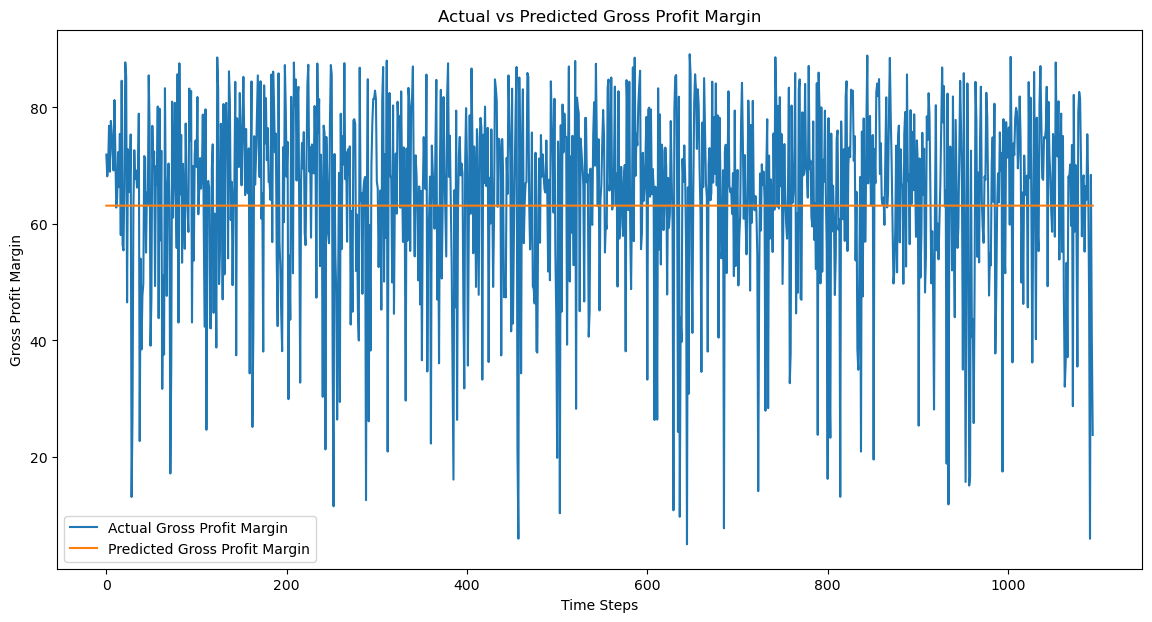

In [84]:
import matplotlib.pyplot as plt

# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and target values to original scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, label='Actual Gross Profit Margin')
plt.plot(y_pred, label='Predicted Gross Profit Margin')
plt.title('Actual vs Predicted Gross Profit Margin')
plt.xlabel('Time Steps')
plt.ylabel('Gross Profit Margin')
plt.legend()
plt.show()


In [73]:
predictions = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [49]:
from keras.models import load_model

# Save the model
model.save('market.h5')


In [50]:
# Load the model
loaded_model = load_model('market.h5')

In [88]:
import numpy as np

# Assume you have the last n_steps data points to create the initial input for prediction
last_sequence = scaled_features[-n_steps:]  # Last n_steps data points
print("Shape of last_sequence:", last_sequence.shape)



Shape of last_sequence: (3, 3)


In [97]:
# Reshape last_sequence for LSTM input
last_sequence = last_sequence.reshape(1, n_steps, last_sequence.shape[1])  # Reshape to (1, n_steps, n_features)

predictions = []

# Predict for 2 months (assuming 1 month = 1 step)
for _ in range(2):  # Predicting 2 months
    pred = model.predict(last_sequence)  # Get prediction
    predictions.append(pred[0, 0])  # Store the prediction

    # Prepare the new input for the next prediction
    # Assuming the first column is Market_Price, the second is Production_Cost, and the third is Crop_Encoded
    new_input = np.array([[pred[0, 0], last_sequence[0, -1, 1], last_sequence[0, -1, 2]]])
    last_sequence = np.append(last_sequence[:, 1:, :], new_input.reshape(1, 1, -1), axis=1)  # Shift the window

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [95]:
print(model.input_shape)


(None, 3, 3)


In [99]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Sample DataFrame structure
# Assuming you've loaded your DataFrame as 'train'
# train = pd.read_csv('your_data.csv')

# Define features and target variable
features = ['Market_Price', 'Production_Cost', 'Crop_Encoded']
target = 'Gross_Profit_Margin'

# Preprocess the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])

# Prepare data for LSTM
X, y = [], []
sequence_length = 3  # Use the last 3 observations

for i in range(len(train_scaled) - sequence_length):
    X.append(train_scaled[i:i + sequence_length])
    y.append(train_scaled[i + sequence_length, 2])  # Assuming Gross Profit Margin is at index 2

X, y = np.array(X), np.array(y)

# Create LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(LSTM(50))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)



Epoch 1/100


/home/ghost/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


172/172 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.3948
Epoch 2/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1017
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0857
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0639
Epoch 5/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0541
Epoch 6/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0525
Epoch 7/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0522
Epoch 8/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0520
Epoch 9/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0519
Epoch 10/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0518
Epoch 11/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0518
Epoch 12/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0517
Epoch 13/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0517
Epoch 14/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0516
Epoch 15/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step -

/root/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 3 and the array at index 1 has size 1


In [104]:
import numpy as np

import numpy as np

def predict_future(crop_encoded):
    # Filter data for the specific crop
    crop_data = train[train['Crop_Encoded'] == crop_encoded].copy()

    # Ensure there's enough data
    if len(crop_data) < sequence_length:
        raise ValueError("Not enough data for the selected crop.")

    # Get the last `sequence_length` entries for features
    last_sequence = crop_data[features].values[-sequence_length:]

    # Scale the last sequence
    last_sequence_scaled = scaler.transform(last_sequence)
    last_sequence_scaled = last_sequence_scaled.reshape(1, sequence_length, len(features))

    predictions = []
    for _ in range(2):  # Predict for 2 months
        pred = model.predict(last_sequence_scaled)
        predictions.append(pred[0, 0])

        # Print shapes for debugging
        print("Prediction shape:", pred.shape)
        print("Last sequence scaled shape before update:", last_sequence_scaled.shape)

        # Update the input sequence for the next prediction
        last_sequence_scaled = np.roll(last_sequence_scaled, -1, axis=1)

        # Update the last step with the predicted value
        last_sequence_scaled[0, -1, 0] = pred[0, 0]  # Update Gross Profit Margin

        # Ensure the other features are filled correctly
        # Make sure that you correctly fill the rest of the values
        last_sequence_scaled[0, -1, 1:] = last_sequence[-1, 1:]

        # Print shape after update for debugging
        print("Last sequence scaled shape after update:", last_sequence_scaled.shape)

    # Inverse transform predictions if necessary
    predictions_original = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions_original




# Example prediction for specific crops
try:
    predictions_cabbage = predict_future(23)
    predictions_spinach = predict_future(133)

    print("Predictions for Cabbage:", predictions_cabbage)
    print("Predictions for Spinach:", predictions_spinach)
except ValueError as e:
    print(e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/root/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction shape: (1, 1)
Last sequence scaled shape before update: (1, 3, 3)
Last sequence scaled shape after update: (1, 3, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediction shape: (1, 1)
Last sequence scaled shape before update: (1, 3, 3)
Last sequence scaled shape after update: (1, 3, 3)
non-broadcastable output operand with shape (2,1) doesn't match the broadcast shape (2,3)


# New Data Analysis

In [130]:
data = pd.read_excel("MarketDATA.xlsx")

In [133]:
data.tail()

,Date,Crop,Market_Price,Production_Cost,Gross_Profit_Margin
5971,2024-08-01,Vanilla,25.94,6.90,73.39
5972,2024-09-01,Vanilla,25.91,5.77,77.73
5973,2024-10-01,Vanilla,8.93,4.52,49.40
5974,2024-11-01,Vanilla,29.18,5.46,81.28
5975,2024-12-01,Vanilla,21.36,7.53,64.75


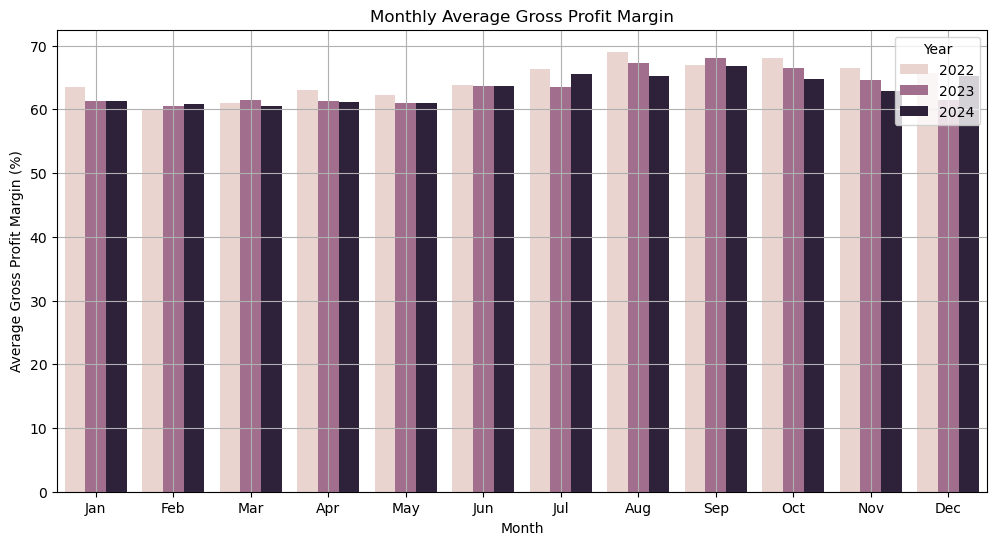

In [136]:
import seaborn as sns
# Extract month and year for analysis
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# 1. Monthly Average Gross Profit Margin
monthly_avg_gpm = data.groupby(['Year', 'Month'])['Gross_Profit_Margin'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_avg_gpm, x='Month', y='Gross_Profit_Margin', hue='Year')
plt.title('Monthly Average Gross Profit Margin')
plt.xlabel('Month')
plt.ylabel('Average Gross Profit Margin (%)')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid()
plt.show()


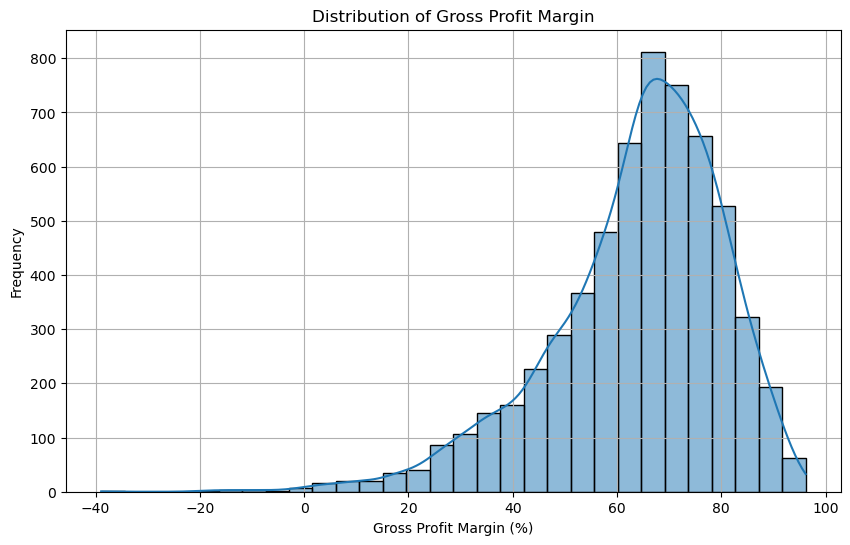

In [137]:
# 2. Distribution of Gross Profit Margin
plt.figure(figsize=(10, 6))
sns.histplot(data['Gross_Profit_Margin'], bins=30, kde=True)
plt.title('Distribution of Gross Profit Margin')
plt.xlabel('Gross Profit Margin (%)')
plt.ylabel('Frequency')
plt.grid()
plt.show()



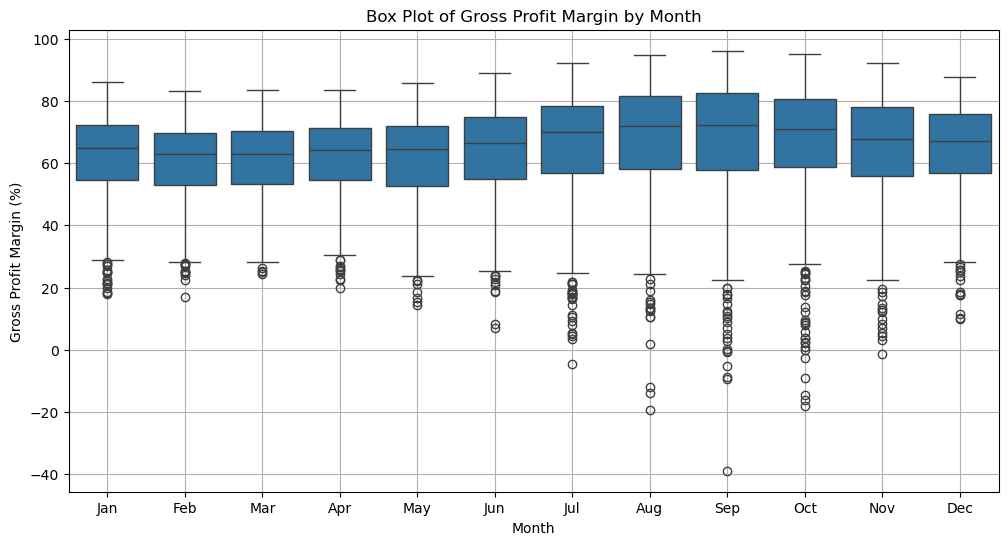

In [138]:
# 3. Box Plot of Gross Profit Margin by Month
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Month', y='Gross_Profit_Margin')
plt.title('Box Plot of Gross Profit Margin by Month')
plt.xlabel('Month')
plt.ylabel('Gross Profit Margin (%)')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()



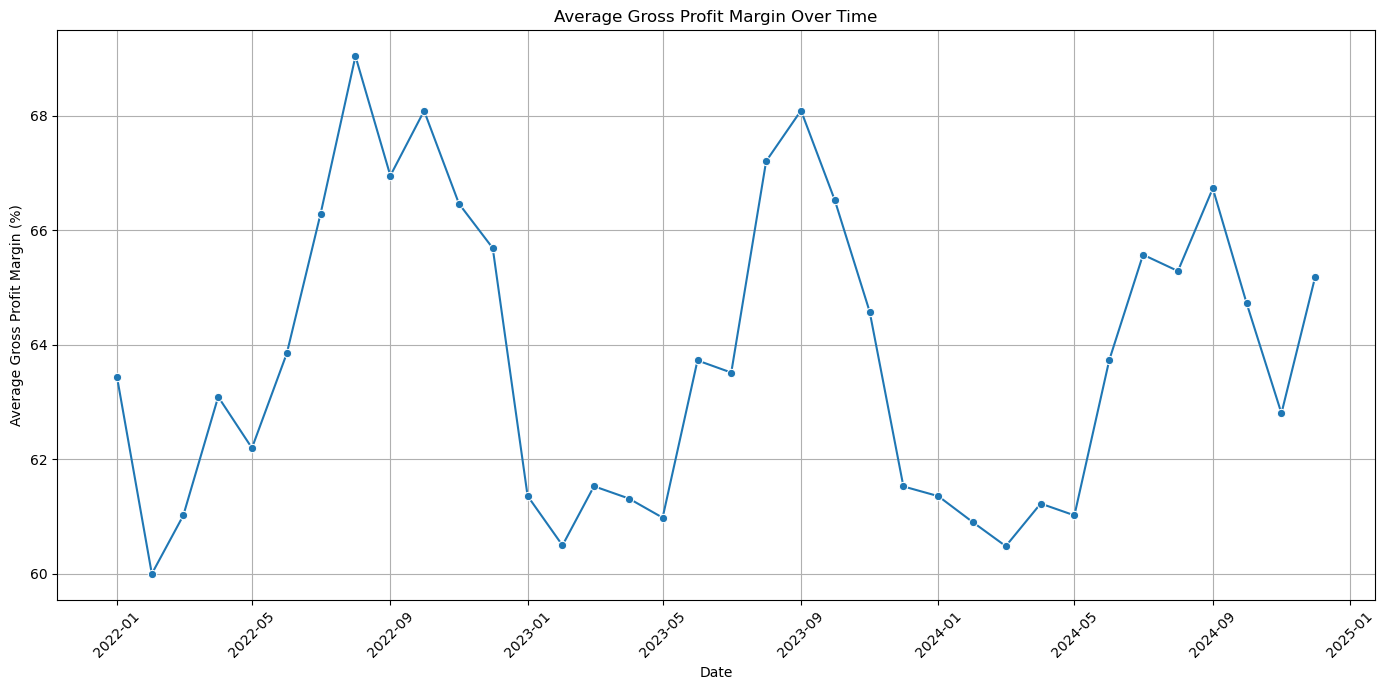

In [139]:
# 4. Line Plot of Gross Profit Margin Over Time
gpm_time = data.groupby(['Date'])['Gross_Profit_Margin'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=gpm_time, x='Date', y='Gross_Profit_Margin', marker='o')
plt.title('Average Gross Profit Margin Over Time')
plt.xlabel('Date')
plt.ylabel('Average Gross Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()